# PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# dataset
WINE = pd.read_csv('wine.csv')
WINE

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
WINE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [3]:
Wine = WINE.drop('Type',axis=1)

In [4]:
Wine.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
# checking for null values
WINE.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
## there are no null values

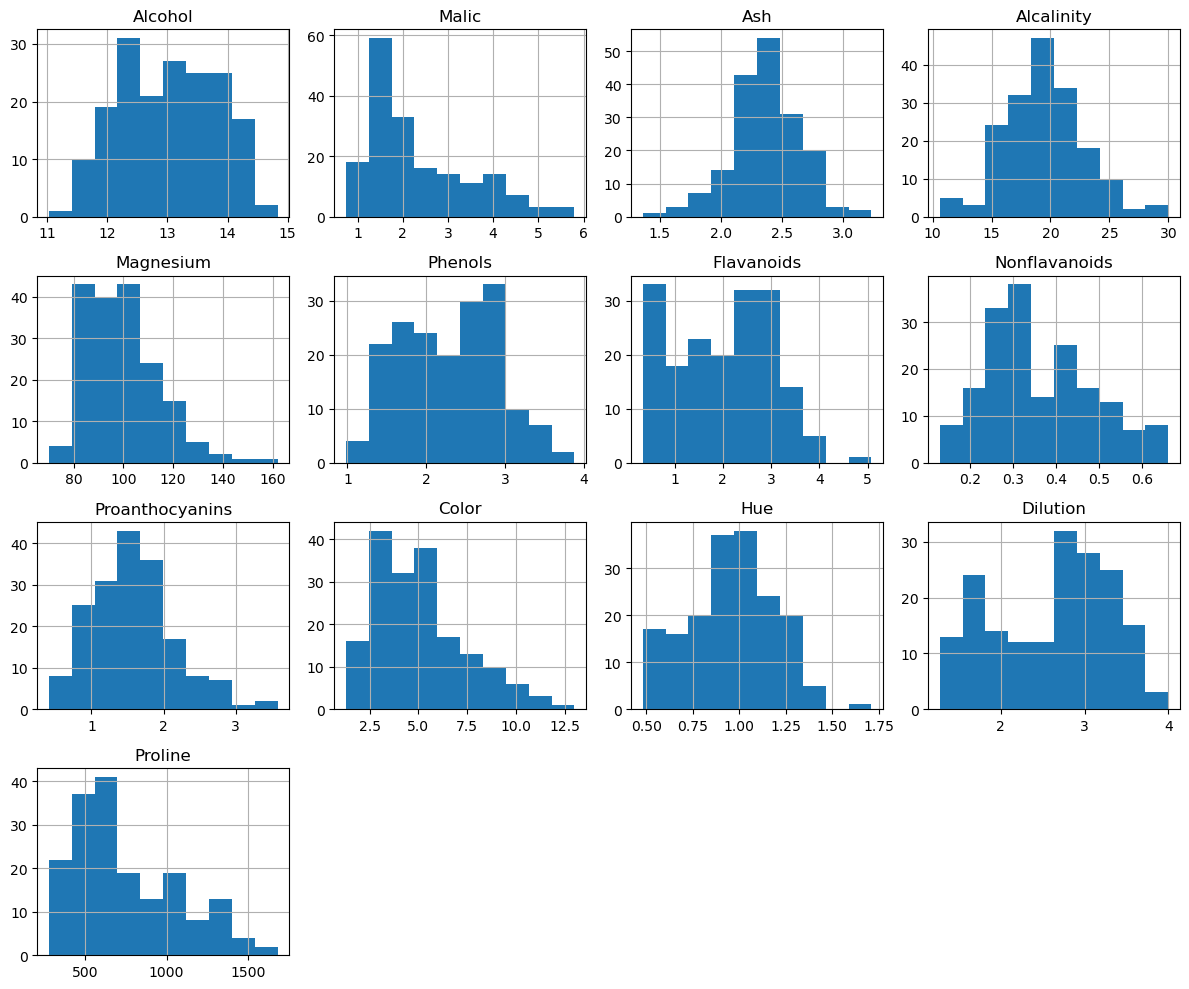

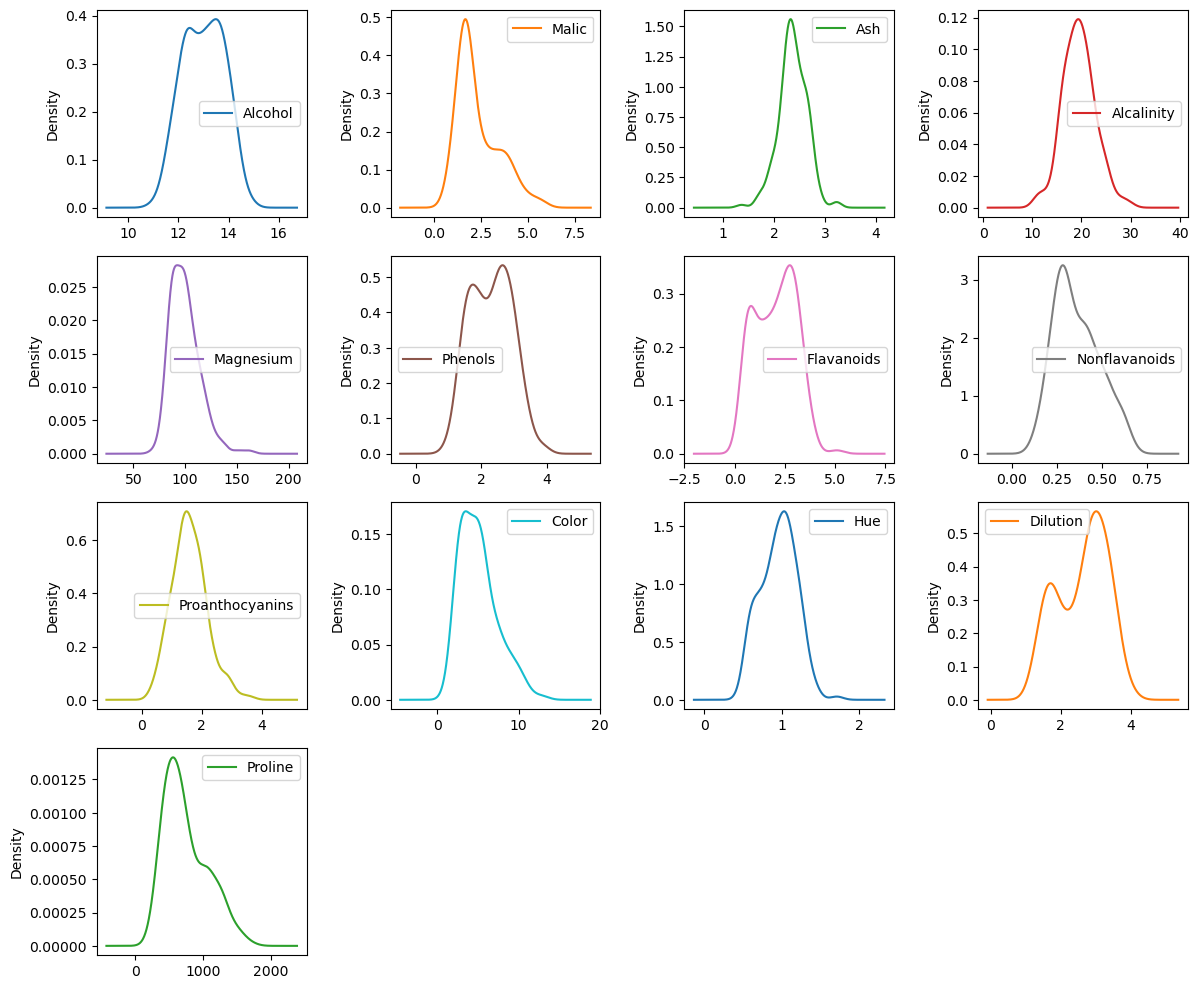

In [7]:
# Plots to visualize for checking the distribution

# Histograms
Wine.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


# Density plots
Wine.plot(kind='density', subplots=True, layout=(4,4), figsize=(12,10), sharex=False)
plt.tight_layout()
plt.show()

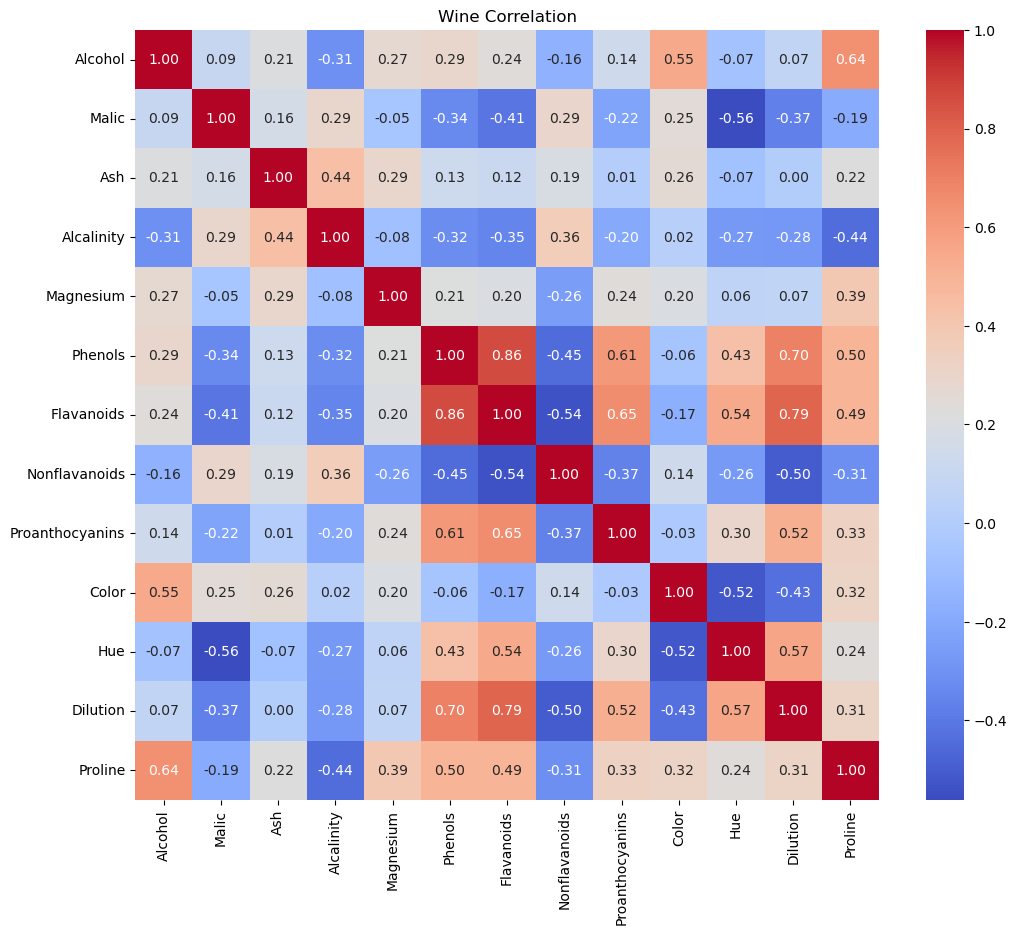

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(Wine.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Wine Correlation")
plt.show()

In [9]:
# Phenols and Flavanoids, Dilution and Proanthocyanins has high positive correlation with each other
# Flavanoids and Proanthocyanins and Dilution has high positive correlation 
# Dilution and hue has positive correlation
# Alcohol and proline has positive correlation
# Flavanoids and nonflavonoids in nigatively correlated.

In [10]:
from sklearn.preprocessing import StandardScaler

features = Wine.select_dtypes(include='number')
scaler = StandardScaler()
Wine_data = scaler.fit_transform(features)
Wine_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

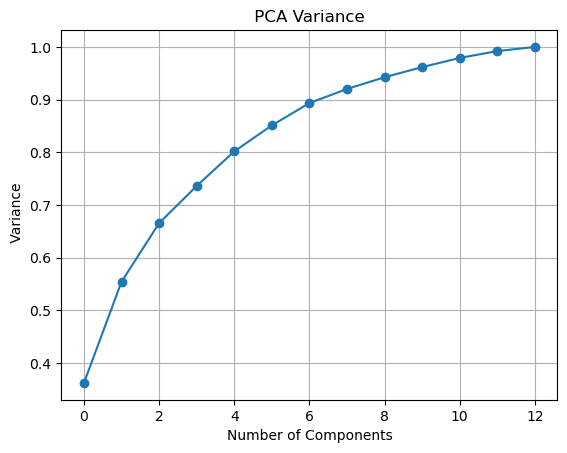

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca_Wine = pca.fit_transform(Wine_data)
# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel(' Variance')
plt.grid(True)
plt.title(' PCA Variance ')
plt.show()
pca_Wine

In [12]:
# 1 - 3 is around 68 % variance after that it increases and reaches 99% at 11th component

In [13]:
# Assume we choose enough components to explain ~95% of variance
pca = PCA(n_components=0.95)
pca_Winedata = pca.fit_transform(pca_Wine)

In [14]:
pca_Winedata

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         6.51390947e-02,  6.41442706e-01,  1.02095585e+00],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
         1.02441595e+00, -3.08846753e-01,  1.59701372e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -3.44216131e-01, -1.17783447e+00,  1.13360857e-01],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         4.70238043e-02,  1.22214687e-03, -2.47997312e-01],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         3.90828774e-01,  5.74476725e-02,  4.91489502e-01],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.92913734e-01,  7.41660423e-01, -1.17969019e-01]])

In [15]:
# Original data with k means

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(Wine_data)

# Metrics
sil_score = silhouette_score(Wine_data, clusters)
db_score = davies_bouldin_score(Wine_data, clusters)
print(f'Silhouette Score: {sil_score:.2f}')
print(f'Davies-Bouldin Index: {db_score:.2f}')
import warnings
warnings.filterwarnings('ignore')


C:\Users\JOSHUAVIJAYA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\JOSHUAVIJAYA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.28
Davies-Bouldin Index: 1.39


In [17]:
# silhouette score is low
# clusters are not well separated

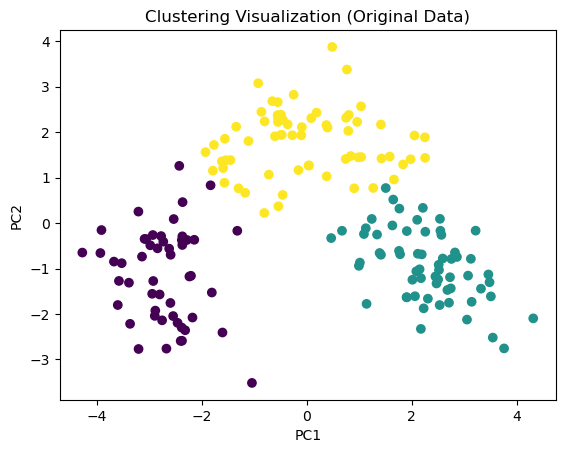

In [18]:
# PCA for visualization
pca_2d = PCA(n_components=2)
visual_data = pca_2d.fit_transform(Wine_data)

plt.scatter(visual_data[:, 0], visual_data[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering Visualization (Original Data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [19]:
# With PCA

In [20]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans_pca.fit_predict(pca_Winedata)

# Metrics
sil_pca = silhouette_score(pca_Winedata, pca_clusters)
db_pca = davies_bouldin_score(pca_Winedata, pca_clusters)
print(f'Silhouette Score (PCA): {sil_pca:.2f}')
print(f'Davies-Bouldin Index (PCA): {db_pca:.2f}')


Silhouette Score (PCA): 0.30
Davies-Bouldin Index (PCA): 1.34


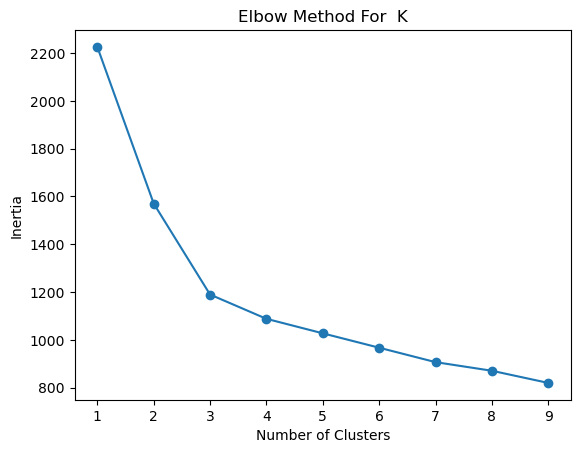

In [21]:
# elbow method
inertia = [] 
K = range(1, 10)
for k in K:
    kM = KMeans(n_clusters=k, random_state=40, n_init=10)
    kM.fit(pca_Winedata)
    inertia.append(kM.inertia_)

plt.figure()
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method For  K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
kmeans = KMeans(n_clusters=3, random_state=40, n_init=10)
kmeans_labels = kmeans.fit_predict(pca_Winedata)
Wine['KMeans_Cluster'] = kmeans_labels

In [22]:
# the elobow point is at 3 which is correct for 3 clusters

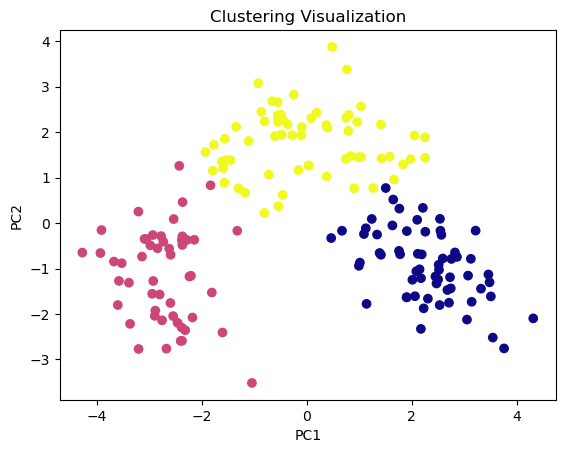

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082],
       [ 3.05025392, -2.12240111],
       [ 2.44908967, -1.17485013],
       [ 2.05943687, -1.60896307],
       [ 2.5108743 , -0.91807096],
       [ 2.75362819, -0.78943767],
       [ 3.47973668, -1.30233324],
       [ 1.7547529 , -0.61197723],
       [ 2.11346234, -0.67570634],
       [ 3.45815682, -1.13062988],
       [ 4.31278391, -2.09597558],
       [ 2.3051882 , -1.66255173],
       [ 2.17195527, -2.32730534],
       [ 1.89897118, -1.63136888],
       [ 3.54198508, -2.51834367],
       [ 2.0845222 , -1.06113799],
       [ 3.12440254, -0.78689711],
       [ 1.08657007, -0.24174355],
       [ 2.53522408,  0.09184062],
       [ 1.64498834,  0.51627893],
       [ 1.76157587,  0.31714893],
       [ 0.9900791 , -0.94066734],
       [ 1.77527763, -0.68617513],
       [ 1.23542396,  0.08980704],
       [ 2.18840633,

In [23]:
# plot
pca_Wine = PCA(n_components=2).fit_transform(pca_Winedata)

plt.scatter(pca_Wine[:, 0], pca_Wine[:, 1], c=pca_clusters, cmap='plasma')
plt.title('Clustering Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
pca_Wine

In [24]:
print(f"Original Data Silhouette Score: {sil_score:.2f}")
print(f"PCA Data Silhouette Score: {sil_pca:.2f}")
print(f'Davies-Bouldin Index (PCA): {db_pca:.2f}')

Original Data Silhouette Score: 0.28
PCA Data Silhouette Score: 0.30
Davies-Bouldin Index (PCA): 1.34


# Conclusion

# IT seems the original data is similar to the transformed data with using k means, scree plot and shown silhoutte score and davis - bouldin index 